In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 12.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
#Instance
model = YOLO('yolov8l-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8l-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 88.1M/88.1M [00:00<00:00, 249MB/s]


In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    

In [5]:


from roboflow import Roboflow
rf = Roboflow(api_key="l3ZRwINmzPuMzyjtYwHf")
project = rf.workspace("md-hasibul-islam-dhrubo").project("pavement-damage-detection-3")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Pavement-damage-detection--3-2 in yolov8:: 100%|██████████| 7792/7792 [00:01<00:00, 4004.95it/s]


In [6]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat /kaggle/working/Pavement-damage-detection--3-2/data.yaml

names:
- Crack
- Edgecrack
- pothole
nc: 3
roboflow:
  license: CC BY 4.0
  project: pavement-damage-detection-3
  url: https://universe.roboflow.com/md-hasibul-islam-dhrubo/pavement-damage-detection-3/dataset/2
  version: 2
  workspace: md-hasibul-islam-dhrubo
test: ../test/images
train: Pavement-damage-detection--3-2/train/images
val: Pavement-damage-detection--3-2/valid/images


In [7]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [8]:
%%writetemplate /kaggle/working/Pavement-damage-detection--3-2/data.yaml

names:
- Crack
- Edgecrack
- pothole
nc: 3
roboflow:
  license: CC BY 4.0
  project: pavement-damage-detection-3
  url: https://universe.roboflow.com/md-hasibul-islam-dhrubo/pavement-damage-detection-3/dataset/2
  version: 2
  workspace: md-hasibul-islam-dhrubo
test: /kaggle/working/Pavement-damage-detection--3-2/test/images
train: /kaggle/working/Pavement-damage-detection--3-2/train/images
val: /kaggle/working/Pavement-damage-detection--3-2/valid/images

In [9]:
%cat /kaggle/working/Pavement-damage-detection--3-2/data.yaml


names:
- Crack
- Edgecrack
- pothole
nc: 3
roboflow:
  license: CC BY 4.0
  project: pavement-damage-detection-3
  url: https://universe.roboflow.com/md-hasibul-islam-dhrubo/pavement-damage-detection-3/dataset/2
  version: 2
  workspace: md-hasibul-islam-dhrubo
test: /kaggle/working/Pavement-damage-detection--3-2/test/images
train: /kaggle/working/Pavement-damage-detection--3-2/train/images
val: /kaggle/working/Pavement-damage-detection--3-2/valid/images


In [10]:
# define number of classes based on YAML
import yaml
with open("/kaggle/working/Pavement-damage-detection--3-2/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

3


In [11]:
!pip install wandb

In [12]:
import wandb
wandb.login(key='cded8b1a7da321c343539af568490414199ad5c7')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [13]:
# Train the model
results = model.train(data='/kaggle/working/Pavement-damage-detection--3-2/data.yaml',
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=8,
                      imgsz=640)

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/kaggle/working/Pavement-damage-detection--3-2/data.yaml, epochs=100, time=None, patience=0, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-03-27 04:24:06,765	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-27 04:24:07,720	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-27 04:24:10.059043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 04:24:10.059153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 04:24:10.198317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

wandb: Currently logged in as: mithachowdhury33 (mitha). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.16.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.4
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240327_042420-i0605mvl
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/mitha/YOLOv8
wandb: 🚀 View run at https://wandb.ai/mitha/YOLOv8/runs/i0605mvl


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 75.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Pavement-damage-detection--3-2/train/labels... 3590 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3590/3590 [00:04<00:00, 884.88it/s]


train: New cache created: /kaggle/working/Pavement-damage-detection--3-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Pavement-damage-detection--3-2/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 816.65it/s]

val: New cache created: /kaggle/working/Pavement-damage-detection--3-2/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.84G       1.75      3.751      2.705       1.97         13        640: 100%|██████████| 449/449 [05:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        200        226      0.136      0.186     0.0811     0.0217      0.153      0.141     0.0853     0.0176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.41G      1.754        3.6      2.487      1.937         16        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226      0.244      0.502      0.245     0.0915      0.223      0.417      0.183     0.0544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.28G      1.659       3.48       2.33      1.861         15        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.297      0.465      0.264     0.0904      0.273      0.427      0.232      0.079



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.63G      1.585       3.38      2.185      1.793         21        640: 100%|██████████| 449/449 [05:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.465       0.52      0.429      0.197      0.461      0.454      0.376      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.39G      1.529      3.285      2.097      1.742         22        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.494      0.532      0.463      0.199      0.469      0.511       0.42      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.97G      1.478      3.197      2.002      1.721         25        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.493      0.511      0.427      0.214      0.461      0.495      0.394      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.27G      1.462       3.16      1.932      1.688         17        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226        0.4      0.569      0.426      0.206      0.383      0.512      0.373      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.42G      1.429      3.084      1.892      1.673         21        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.558      0.505       0.47      0.197      0.433       0.47      0.379       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.15G      1.403      3.068      1.813      1.655         24        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.575       0.59      0.589      0.304      0.596      0.519      0.527      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.06G      1.386      3.019      1.769      1.631         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.569       0.56      0.539      0.303       0.49      0.542      0.476      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.06G      1.377      3.001      1.744      1.627         18        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226      0.576      0.587      0.561      0.271      0.498       0.54      0.479      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.36G      1.359      2.983       1.71      1.615         24        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.459      0.495      0.493       0.24      0.417      0.418      0.412      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.06G      1.346      2.948      1.685      1.601         18        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.682      0.608      0.646      0.387      0.651      0.581      0.603      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.28G      1.324      2.902      1.653      1.588         17        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.649      0.558      0.608       0.33      0.618      0.515      0.546      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.31G       1.33      2.898      1.658      1.585         12        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.583      0.628      0.604      0.331      0.561       0.63      0.562      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       8.3G      1.303      2.875      1.612      1.575         20        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.615      0.562      0.613      0.319      0.633      0.537      0.573      0.256



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.06G      1.319      2.912       1.62      1.585         16        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.653      0.628      0.643      0.354      0.643      0.607       0.58      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.31G       1.32       2.89      1.612      1.586         17        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.556      0.628      0.628      0.359      0.512      0.597      0.575      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.32G      1.287       2.84      1.566      1.565         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.586       0.62      0.648      0.365      0.569      0.609       0.61       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       8.4G      1.289      2.808      1.546      1.554         28        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.668      0.651      0.662      0.411      0.639      0.635      0.616      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.41G      1.256      2.796      1.495      1.538         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.703      0.645      0.721      0.437        0.7      0.646      0.682       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.48G      1.247      2.774        1.5      1.522         15        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.625      0.626      0.623      0.317      0.593      0.541      0.534      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.87G      1.259      2.777      1.501      1.548         13        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226       0.64      0.666      0.686      0.393      0.624      0.647      0.633       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       8.3G      1.253      2.776      1.494      1.536         20        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.658      0.653      0.686      0.438      0.648      0.645       0.66      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.49G       1.24      2.742      1.459      1.517         27        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.652      0.647      0.688      0.427      0.624      0.636      0.644       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       8.4G       1.23      2.737      1.455      1.516         13        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.654      0.688      0.738      0.463      0.638      0.674       0.69      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.47G      1.237      2.738      1.454      1.515         15        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.746      0.598      0.699      0.414      0.708      0.573      0.631      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.36G      1.206      2.673      1.393      1.491         16        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.647      0.604      0.637       0.34      0.607      0.569      0.568      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.37G      1.213      2.706      1.388      1.502         10        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.708      0.661      0.706      0.414      0.693      0.542      0.625      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.26G      1.216      2.685      1.397      1.498         20        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.669      0.669      0.705      0.452      0.687      0.609      0.657      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.36G      1.213      2.661      1.387      1.506         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.837      0.662      0.748      0.454      0.828      0.653      0.701      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.35G        1.2      2.662       1.37      1.489         17        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.734      0.691       0.75      0.454      0.696      0.665      0.692      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.36G      1.186      2.603      1.353      1.489         19        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.691      0.657      0.707      0.377      0.715      0.575      0.637      0.304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       8.4G      1.183      2.651      1.357      1.481         22        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.632      0.666      0.661      0.373      0.617      0.625      0.604      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.58G      1.176      2.614      1.325      1.465         16        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.669      0.665      0.707      0.425       0.67       0.59      0.638      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.38G       1.17      2.618      1.315      1.469         24        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.711      0.716      0.729      0.416      0.648      0.654       0.65      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.39G      1.167      2.592      1.322      1.462         22        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.708      0.619      0.699      0.416      0.696      0.569      0.634      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.07G      1.177      2.602      1.316      1.467         26        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226      0.735      0.727      0.765      0.462      0.691      0.678      0.699      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.51G       1.16      2.582      1.313      1.461         19        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.702      0.765      0.749      0.457      0.677      0.746      0.705      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.28G      1.156       2.57      1.299      1.453         13        640: 100%|██████████| 449/449 [05:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.719      0.642       0.67      0.396      0.681      0.615       0.62      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.27G      1.134      2.532      1.256      1.439         18        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226       0.73      0.607      0.698      0.424      0.732      0.603      0.662      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.25G      1.145      2.548      1.282      1.456         16        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.672       0.62      0.652      0.334      0.546      0.545      0.551      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.34G      1.147       2.53      1.243      1.443         18        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226      0.751      0.689      0.737      0.456      0.723      0.663      0.669      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.39G      1.133      2.529      1.231      1.441         15        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.705      0.671      0.707      0.429      0.666      0.652      0.648      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.94G      1.122      2.501      1.228      1.431         19        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.711      0.702      0.732       0.46      0.662      0.641      0.666       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.38G       1.13      2.486      1.218      1.439         18        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.613      0.673      0.693      0.443      0.689      0.623      0.649      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.31G      1.105      2.479      1.189      1.409         17        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226      0.688       0.68      0.722      0.457      0.646      0.649       0.66       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.37G      1.109      2.468      1.186      1.417         13        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226      0.693       0.72      0.752      0.467      0.662      0.683      0.699      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.36G        1.1      2.488      1.186      1.411         19        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]

                   all        200        226      0.767      0.679      0.778      0.478      0.712      0.631      0.682      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.48G      1.104      2.458      1.177      1.413         20        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.709      0.655       0.71      0.438      0.655      0.659       0.66      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.48G      1.089      2.431       1.18      1.409         22        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.775      0.673      0.739      0.442      0.743      0.649      0.681      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.36G      1.091      2.442      1.173      1.408         19        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.672      0.741      0.775      0.488      0.757      0.627      0.703      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.95G      1.092      2.422      1.155      1.408         20        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.758      0.642      0.717      0.465      0.715      0.614      0.663      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.47G      1.063      2.368      1.119      1.387         14        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.648      0.691      0.738      0.451      0.655      0.629      0.665      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.25G      1.068      2.402       1.12      1.387         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226       0.69      0.666      0.736      0.446      0.683      0.638      0.662      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.25G      1.065      2.394       1.11       1.38         16        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.706      0.699      0.724      0.436      0.684      0.664      0.672      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.37G      1.063      2.386      1.116      1.383         17        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226      0.734      0.709      0.756      0.471      0.745       0.68      0.709      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.37G      1.038      2.354      1.067      1.367         17        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.743      0.677      0.707       0.45      0.699      0.643      0.657      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.58G      1.055      2.365      1.084      1.374         23        640: 100%|██████████| 449/449 [05:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.743      0.648      0.733      0.452      0.746       0.64      0.704      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.38G      1.028      2.328      1.066      1.358         22        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.735      0.653      0.705       0.41      0.702      0.637      0.639      0.326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.09G       1.02      2.309      1.048      1.355         19        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.689      0.679      0.735      0.461      0.641      0.632      0.664      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.33G      1.025      2.326      1.047      1.356         18        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.777      0.639      0.735      0.454      0.733      0.606      0.674      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.24G      1.018      2.315      1.036      1.351         21        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226      0.677      0.671      0.706      0.436       0.68      0.594      0.621       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.29G      1.011      2.273       1.03      1.343         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.755      0.692      0.734      0.448      0.704      0.667      0.674      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.83G      1.006      2.269      1.014      1.342         13        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.723      0.695      0.754       0.45      0.624      0.658      0.663      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.02G      1.005      2.274       1.01      1.335         14        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.706      0.764      0.754      0.467      0.674      0.719      0.685       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.28G     0.9896      2.269      1.006      1.324         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.716      0.693      0.737      0.456      0.692       0.67      0.688      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.34G     0.9864      2.249     0.9864      1.323         19        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.703      0.718      0.749      0.454      0.652      0.673      0.651      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.41G     0.9894      2.248     0.9763      1.329         14        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.746      0.645      0.752      0.461      0.707      0.626      0.664      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.28G     0.9824      2.216     0.9783      1.321         22        640: 100%|██████████| 449/449 [05:07<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.659      0.681      0.699      0.423      0.671      0.606      0.617      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.38G     0.9761      2.224     0.9798       1.32         17        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.713      0.702      0.754      0.459      0.658      0.651      0.645      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.29G     0.9602      2.191     0.9448      1.305         18        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        200        226      0.767      0.651      0.739      0.449      0.734      0.623       0.66      0.336



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       8.4G     0.9637      2.182     0.9585      1.306         17        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226       0.83      0.663      0.769      0.466       0.79      0.591       0.66      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.84G     0.9527      2.184     0.9597      1.305         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.811      0.649      0.765      0.465      0.726      0.619      0.663      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.85G     0.9601      2.177     0.9352      1.297         22        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.803      0.647      0.757      0.456       0.77      0.599      0.676      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       8.4G     0.9439       2.17      0.923      1.287         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.701      0.737       0.75      0.442      0.665      0.677      0.669      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.39G     0.9417      2.159       0.92      1.288         14        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.676      0.726      0.739      0.449      0.658      0.651      0.642      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.32G     0.9279      2.121     0.8875      1.276         17        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.788      0.641      0.764      0.462      0.708      0.618      0.668      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.85G     0.9277      2.128     0.8951      1.279         17        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.803       0.64      0.745      0.469      0.763       0.62      0.683      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.85G     0.9154      2.095     0.8727      1.273         14        640: 100%|██████████| 449/449 [05:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        200        226      0.734       0.71      0.755      0.474      0.679      0.673      0.675      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.89G     0.9113      2.089     0.8797       1.27         26        640: 100%|██████████| 449/449 [05:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.779       0.66      0.729      0.442       0.64      0.629      0.621      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.07G     0.8994      2.068     0.8576      1.261         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.705      0.721      0.743       0.46      0.707       0.66      0.664      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.29G     0.9039      2.091     0.8701      1.266         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.826      0.625      0.742       0.46      0.772      0.583      0.654      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.38G     0.8857       2.04     0.8369      1.254         16        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.705      0.712      0.757      0.476      0.631      0.637      0.635      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.41G     0.8833      2.043     0.8453      1.252         15        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.767      0.692       0.77      0.461      0.735      0.677      0.693      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.29G     0.8863      2.049     0.8234      1.252         18        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.832      0.645      0.756       0.46      0.804      0.617      0.676      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.85G     0.8728       2.03      0.828      1.251         27        640: 100%|██████████| 449/449 [05:03<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.714      0.686      0.748      0.467      0.701      0.625      0.668       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.05G      0.867      2.035     0.8205      1.239         16        640: 100%|██████████| 449/449 [05:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.768      0.695      0.751      0.452      0.691      0.633       0.64      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.85G     0.8558      1.991     0.8059      1.229         24        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.764      0.679      0.764       0.47      0.752      0.591      0.677      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.86G      0.853      2.004     0.8077      1.232         19        640: 100%|██████████| 449/449 [05:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.807      0.632      0.756      0.458      0.741      0.593      0.647      0.353


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.08G     0.7784      1.838     0.6401      1.229          7        640: 100%|██████████| 449/449 [04:52<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226       0.79      0.645       0.75      0.454       0.71      0.589      0.649      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.44G       0.76      1.777     0.5825      1.214          9        640: 100%|██████████| 449/449 [04:51<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.759       0.67      0.767       0.45      0.686      0.622      0.646      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.04G     0.7464      1.773     0.5812      1.207          8        640: 100%|██████████| 449/449 [04:51<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.751      0.668       0.75      0.455      0.718      0.601      0.647      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.05G     0.7253       1.74     0.5523      1.189          7        640: 100%|██████████| 449/449 [04:51<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226      0.729      0.727      0.755       0.46      0.668      0.666      0.653      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.07G     0.7088      1.717     0.5405      1.171         12        640: 100%|██████████| 449/449 [04:51<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        200        226      0.735      0.705       0.77       0.46      0.678      0.651       0.65      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.09G     0.7033      1.706     0.5346      1.169          8        640: 100%|██████████| 449/449 [04:51<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.724      0.695      0.743      0.449      0.651      0.637      0.621      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.09G     0.7016      1.707     0.5314      1.169          7        640: 100%|██████████| 449/449 [04:52<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]

                   all        200        226      0.722       0.71       0.76      0.456      0.643      0.661      0.647      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.07G      0.695      1.674     0.5223      1.157          7        640: 100%|██████████| 449/449 [04:52<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.707       0.72      0.746      0.452       0.65      0.656      0.631      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.07G     0.6875      1.689     0.5279      1.158          8        640: 100%|██████████| 449/449 [04:52<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        200        226       0.69      0.731      0.749      0.456      0.651      0.665      0.642      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.34G     0.6668      1.659     0.5036      1.139          8        640: 100%|██████████| 449/449 [04:52<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        200        226      0.741      0.696      0.762      0.462      0.672      0.644      0.646      0.344



100 epochs completed in 8.681 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 92.3MB
Optimizer stripped from runs/segment/train/weights/best.pt, 92.3MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8l-seg summary (fused): 295 layers, 45914201 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]


                   all        200        226      0.767      0.679      0.778      0.478      0.712      0.631      0.681      0.397
                 Crack        200         60      0.789      0.433      0.675      0.304      0.644       0.35      0.409       0.12
             Edgecrack        200         47      0.692      0.787      0.829      0.632      0.663      0.745      0.811      0.623
               pothole        200        119       0.82      0.815      0.829      0.498      0.828      0.798      0.824      0.447
Speed: 0.5ms preprocess, 23.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▃▄▅▆▇▆▆▇▇█▇█▇██▇▇▇███▇█████████████████
wandb:        metrics/mAP50(M) ▁▃▄▄▅▇▇▇█▇█▆█▇▇██▇▇█████████▇█▇██▇██▇▇▇█
wandb:     metrics/mAP50-95(B) ▁▂▄▄▅▇▆▆▇▇█▆█▆▇█▇▇▇█▇█▇█████████████████
wandb:     metrics/mAP50-95(M) ▁▂▄▃▄▇▅▆▇▇█▆▇▇▇█▇▇▇█▇▇▇▇█▇█▇▇▇▇██▇▇▇▇▇▇█
wandb:    metrics/precision(B) ▁▃▅▅▅▆▆▅▇▆▆▆█▆▇▇▇▇▆▇▇▆▇▇▇▇▇▇▇█▆█▇▇▇▇▇▇▇▇
wandb:    metrics/precision(M) ▁▂▄▄▅▆▆▅▇▆▆▆█▆▆▆▇▆▇▇▇▆▇▇▆▇▇▇▇▇▆▇▇▆▇▇▇▆▆▇
wandb:       metrics/recall(B) ▁▄▅▅▆▆▆▆▇▇▇▆▇▇▇█▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▆▇▇▇▇▇█▇▇
wandb:       metrics/recall(M) ▁▄▅▅▆▆▆▆▇▇▇▆▇▇▇█▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▇▇▇▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(

In [14]:
from IPython.display import Image

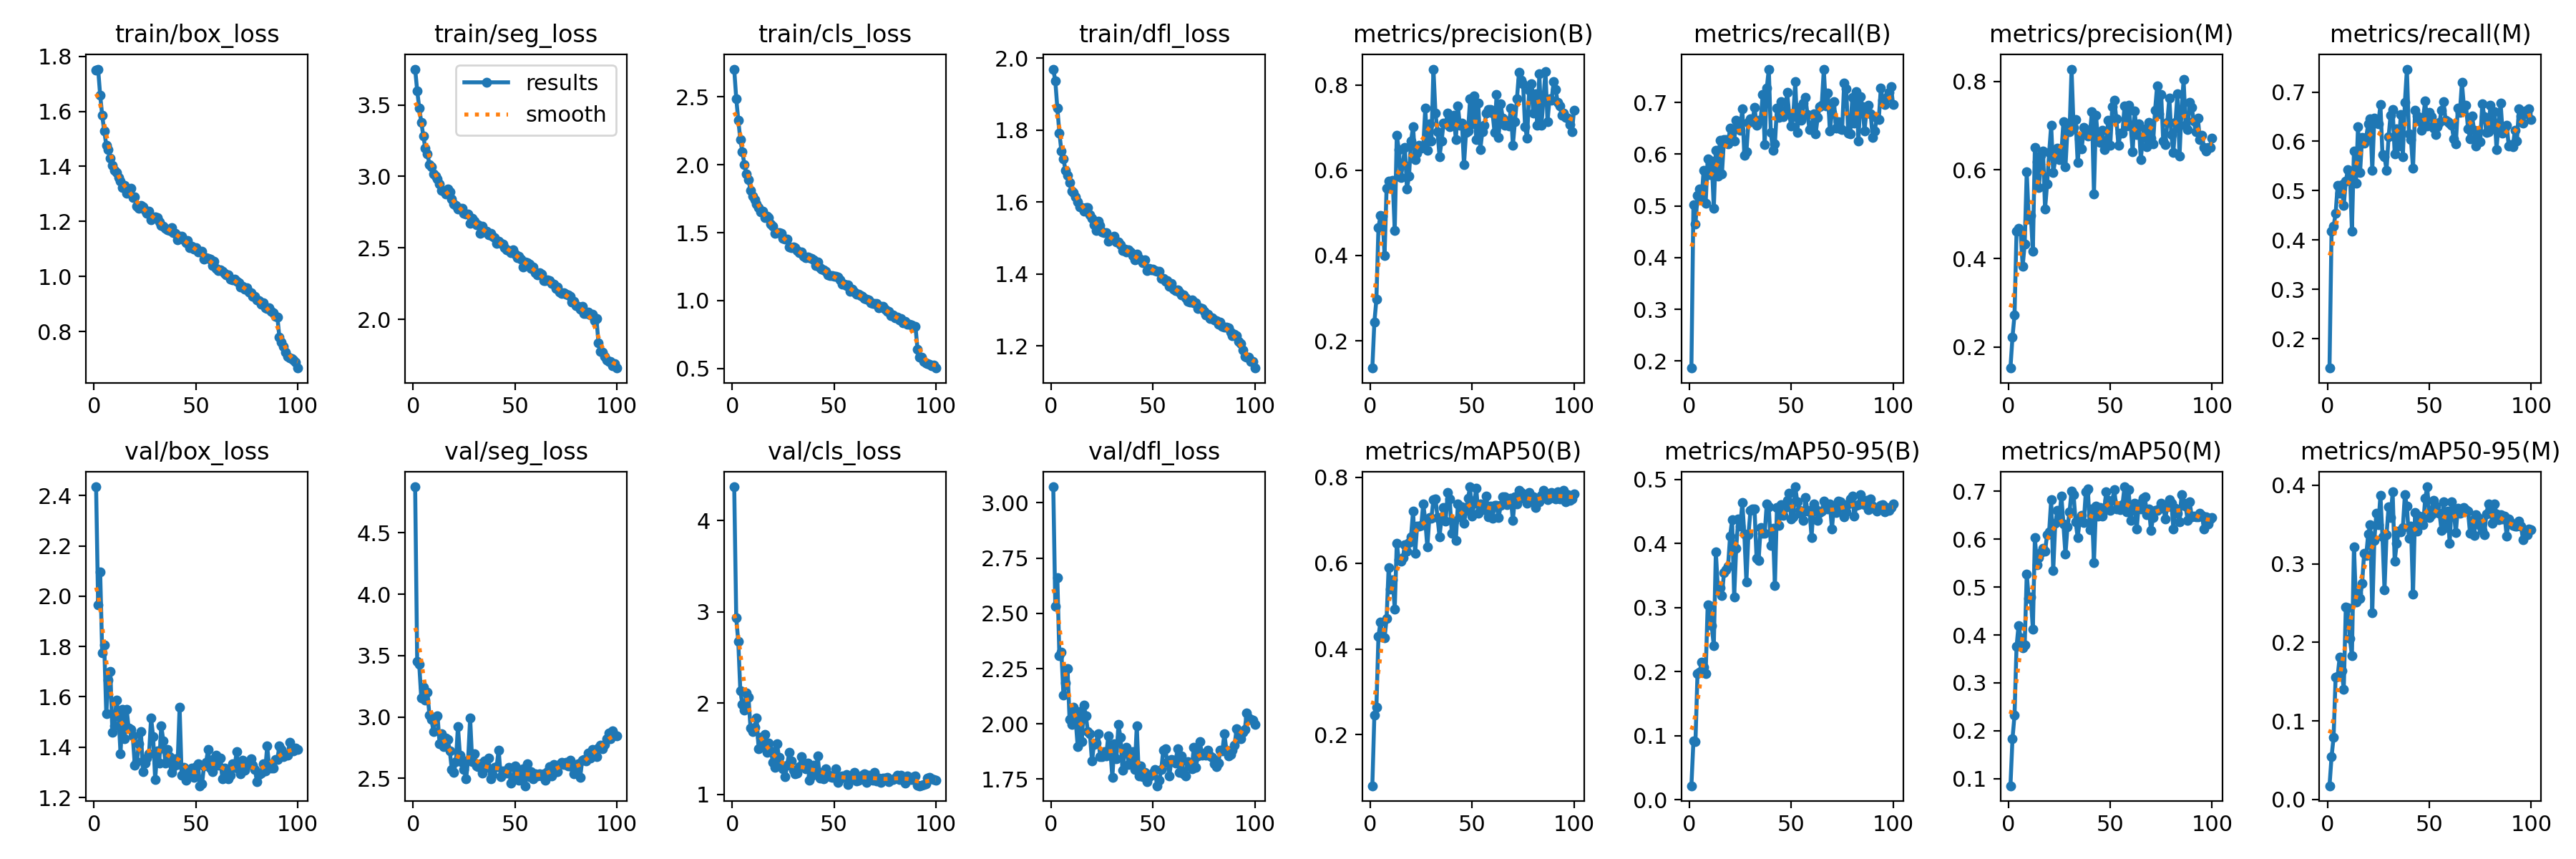

In [15]:
Image("/kaggle/working/runs/segment/train/results.png")

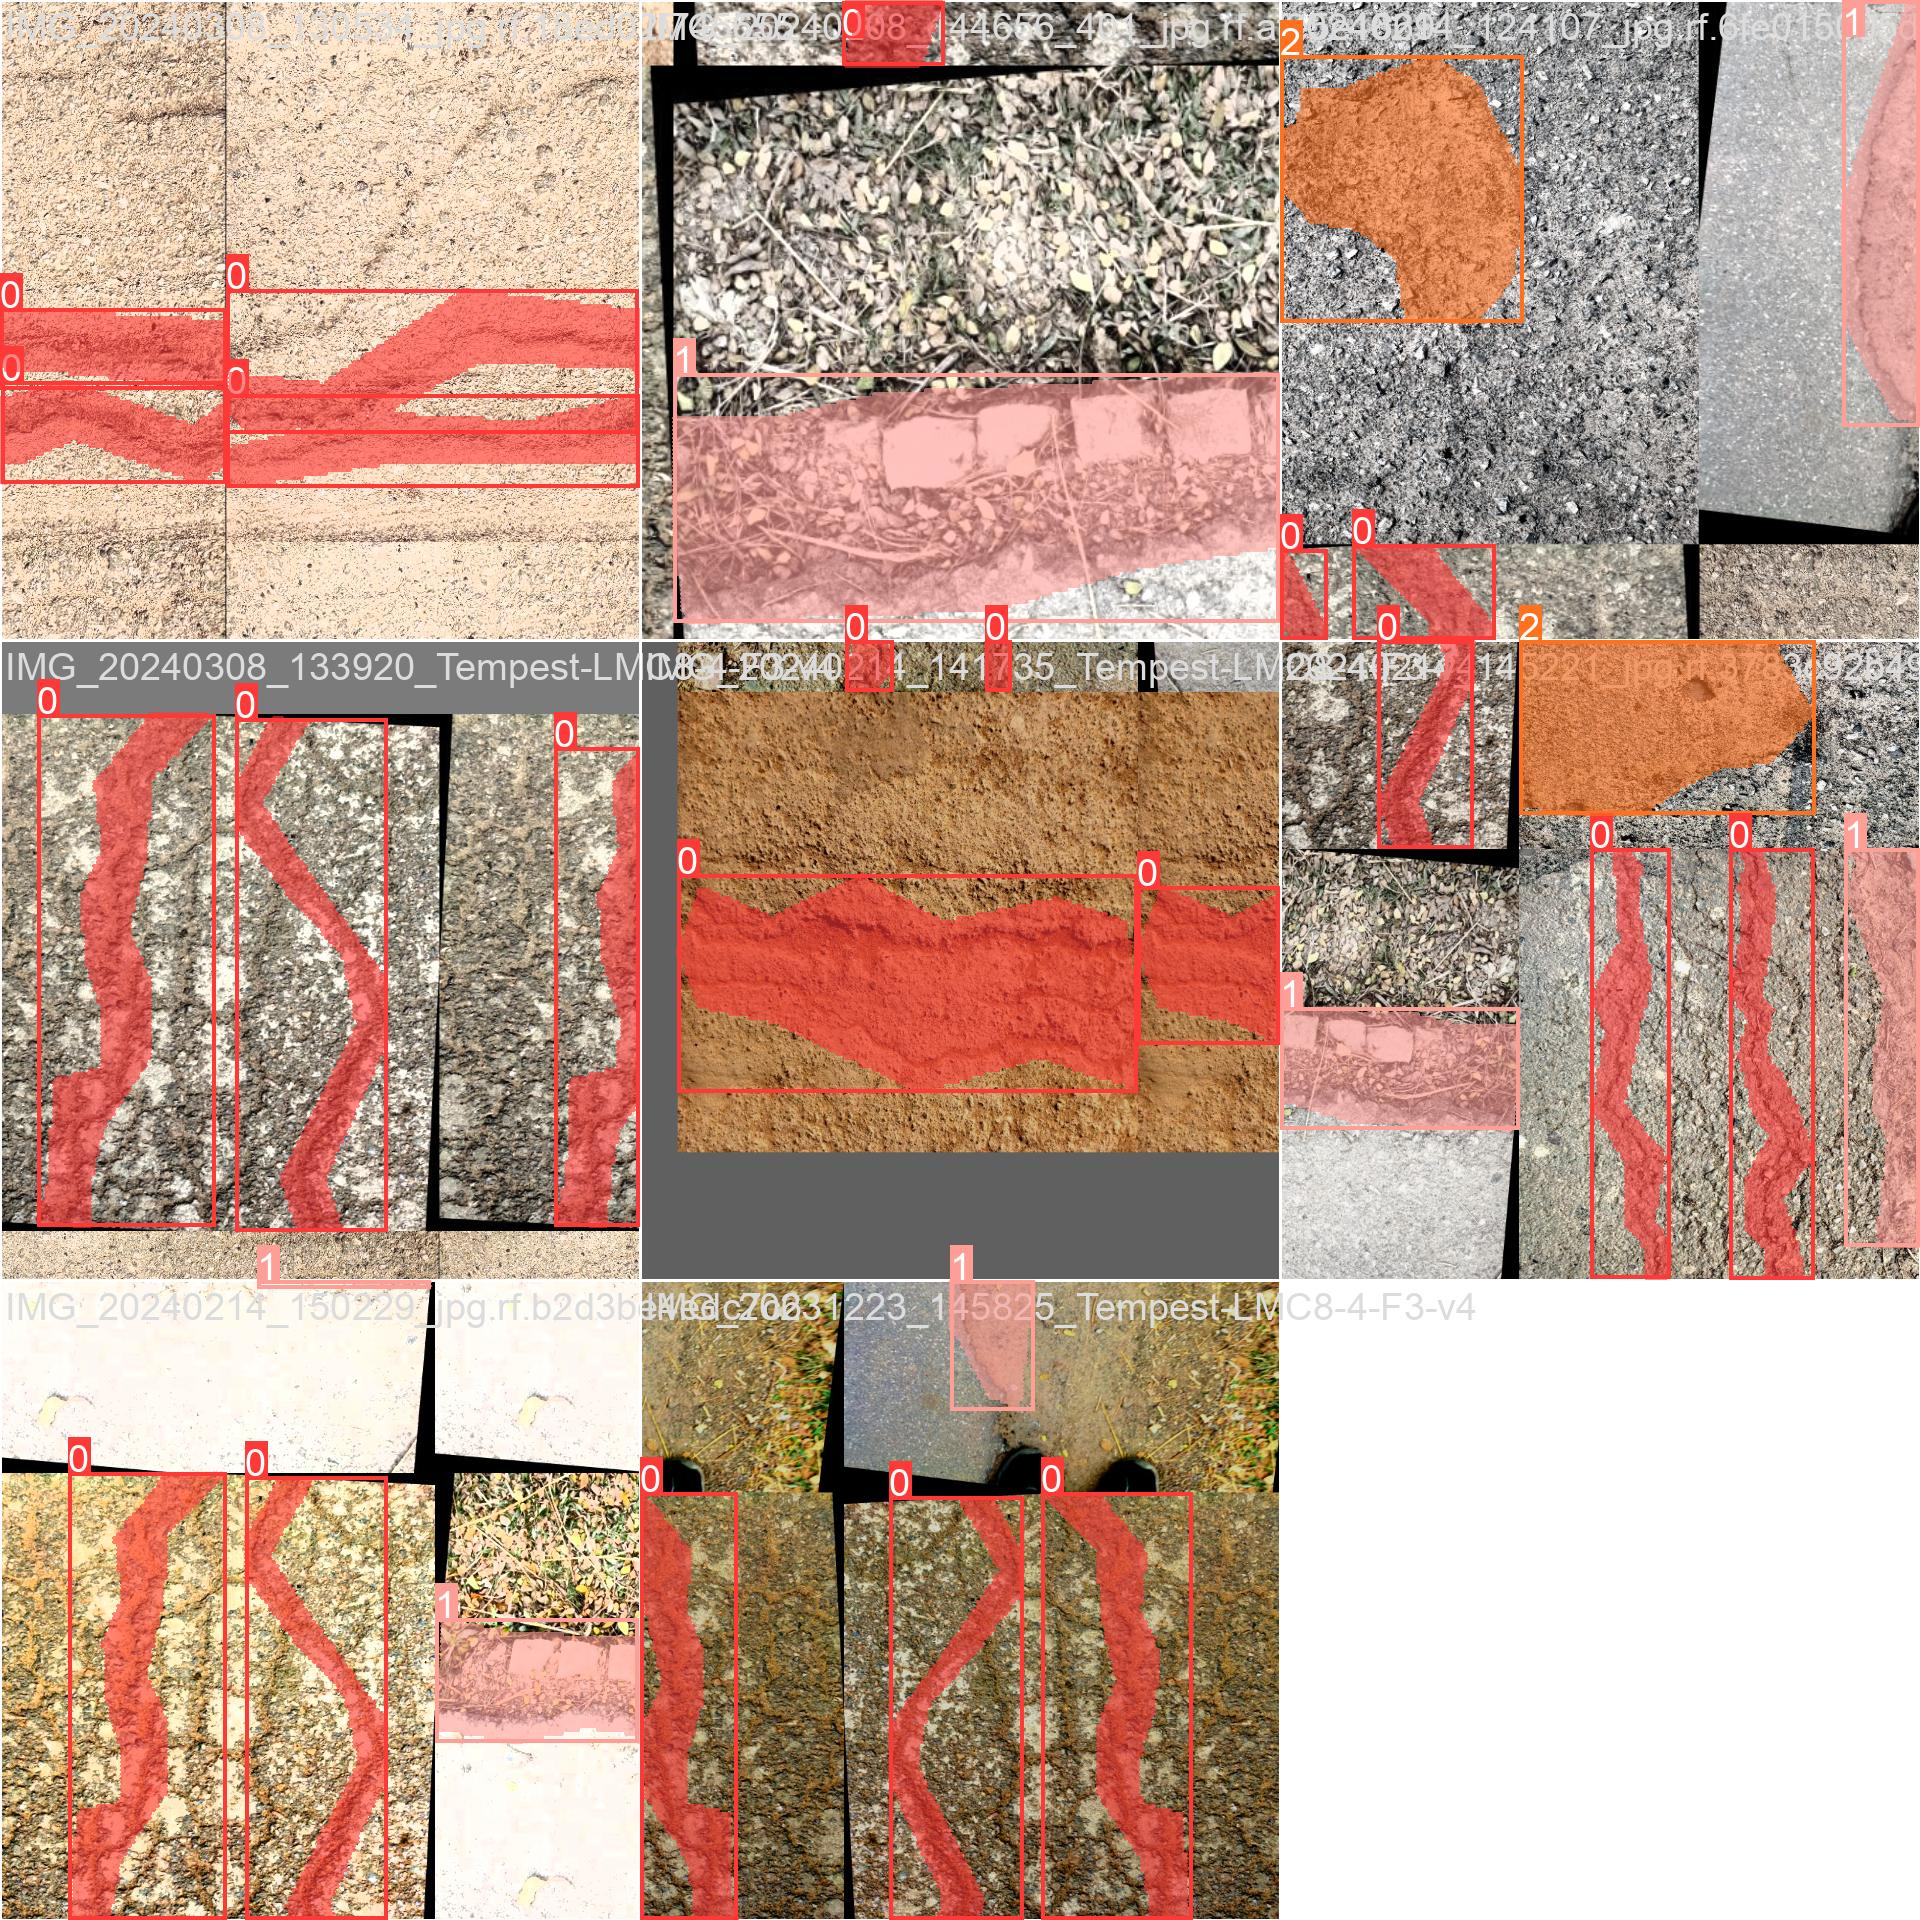

In [16]:
Image("/kaggle/working/runs/segment/train/train_batch1.jpg")

In [17]:
%ls /kaggle/working/runs/segment/train/weights

best.pt  last.pt


In [18]:
my_new_model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

In [19]:
new_image = '/kaggle/working/Pavement-damage-detection--3-2/test/images/IMG_20240308_134605_jpg.rf.9c12a479848ba77d29fb3fa0b71d956b.jpg'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold


image 1/1 /kaggle/working/Pavement-damage-detection--3-2/test/images/IMG_20240308_134605_jpg.rf.9c12a479848ba77d29fb3fa0b71d956b.jpg: 640x640 2 Cracks, 33.9ms
Speed: 1.8ms preprocess, 33.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


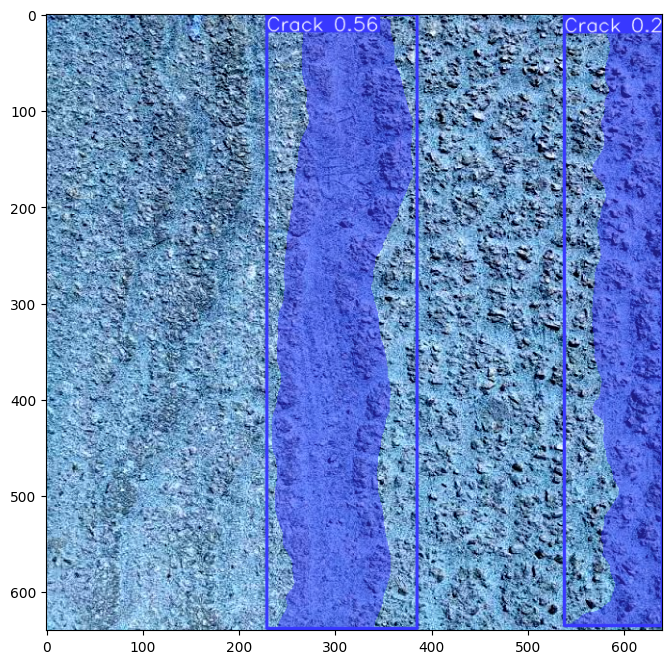

In [20]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(8,8))
plt.imshow(new_result_array)